Danny Abraham
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 2</h2></center>

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

#### Rosenbrock

In [2]:
def rosenbrock(x):
    f = 10 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
    return f

#### Rosenbrock Gradient

In [3]:
def rosenbrock_gradient(x):
    g = np.zeros(2)
    g[0] = -40*x[0]*(x[1] - x[0]**2) + 2*x[0] - 2
    g[1] = 20*x[1] - 20*x[0]**2
    return g

#### Rosenbrock Hessian

In [4]:
def rosenbrock_hessian(x):
    h = np.array([np.zeros(2), np.zeros(2)])
    h[0, 0] = 120*x[0]**2 - 40*x[1] + 2
    h[0, 1] = -40*x[0]
    h[1, 0] = -40*x[0]
    h[1, 1] = 20
    return h

####  Backtrack Line Search

In [5]:
def backtrack_linesearch(f, gk, pk, xk, alpha = 0.01, beta = 0.6):
    t = 1
    while ( f(xk + t*pk) > f(xk) + alpha*t*gk@pk):
        t *= beta
    return t

#### Newton Backtrack Line Search

In [6]:
def newton_backtrack(f, grad, hess, x0, tol = 1e-5):
    x = x0
    history = np.array([x0])
    while (la.norm(grad(x)) > tol):
        p = la.solve(hess(x), -grad(x))
        t = backtrack_linesearch(f, grad(x), p, x)
        x += t * p
        history = np.vstack((history, x))
    return x, history

#### Plotting the performance

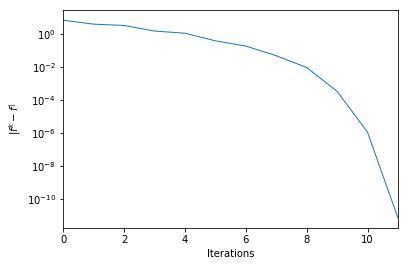

In [7]:
x0 = np.array([-1.2, 1.0])
xstar, history = newton_backtrack(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0)

nsteps = history.shape[0]
fhist = np.zeros(nsteps)

for i in range(nsteps):
    fhist[i] = rosenbrock(history[i,:])
    
plt.figure()
plt.autoscale(enable=True, axis='x', tight=True)
plt.semilogy(np.arange(0, nsteps), fhist, linewidth=1)
plt.xlabel('Iterations')
plt.ylabel(r'$|f^k - f^|$')
plt.show()

Near the minimum, the algorithm converges quatratically
<img src="convergence_expression.png">

Steepest descent converged linearly on the plot, and took over 1000 iterations to reach the local minimum. Newton's method converged in 11 iterations and made more progress the closer it got to the minimum

#### Plotting the contours

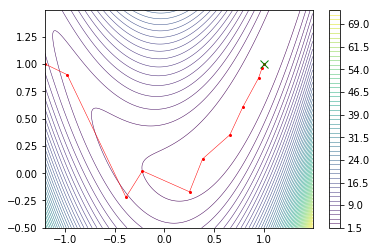

In [8]:
x0 = np.arange(-1.2, 1.5, 0.01)
x1 = np.arange(-0.5, 1.5, 0.01)

F = np.zeros((x1.shape[0], x0.shape[0]))

for i in range(F.shape[0]):
    for j in range(F.shape[1]):
        x = [x0[j], x1[i]]
        F[i, j] = rosenbrock(x)
        
plt.figure('Contours')
plt.plot(history[:,0], history[:,1], linewidth=0.5, color='red', marker='o', markersize=2)
plt.plot([1],[1], color='green', marker='x', markersize=8)
plt.contour(x0, x1, F, 50, linewidths=0.5)
#plt.axis('equal')
plt.colorbar()

#### Function in R^100
<img src="function.png"/>

In [9]:
def f(a, x):
    try:
        f1 = 0
        for at in a:
            f1 += np.log10(1 - at@x)
        f2 = np.sum(np.log10(1 - x**2))
        return - f1 - f2
    except:
        return np.nan

#### R^100 Gradient
<img src="gradient.png"/>

In [10]:
def f_gradient(a, x):
    g = np.zeros(100)
    for j in range(100):        
        term1 = 0
        for i in range(500):
            term1 += a[i, j]/(np.log(10)*(1 - a[i]@x))
        g[j] = term1 + 2*x[j]/(np.log(10)*(1 - x[j]**2))
    return g        

#### R^100 Hessian
<img src="hessian.png"/>

In [11]:
def f_hessian(a, x):
    h = np.zeros([100,100])
    for k in range(100):
        for j in range(100):
            term1 = 0
            for i in range(500):
                term1 += a[i, j]*a[i, k]/(np.log(10)*(1 - a[i]@x)**2)
            if k == j:
                h[k, j] = term1
            else:
                h[k, j] = term1 + (2 + 2*x[j]**2)/(np.log(10)*(1 - x[j]**2)**2)
    return h

The system of equations needed to be solved at every iteration can be written as
<img src="system_equations.png"/>

#### Modified Backtrack Line Search

In [12]:
def backtrack_linesearch_mod(f, gk, pk, xk, a, alpha = 0.01, beta = 0.6):
    t = 1
    while (np.isnan(f(a, xk + t*pk)) or f(a, xk + t*pk) > f(a, xk) + alpha*t*gk@pk):
        t *= beta
    return t

#### Modified Newton Backtrack 

In [13]:
def newton_backtrack_mod(f, grad, hess, x0, a, tol = 1e-5):
    x = x0
    history = np.array([x0])
    while (la.norm(grad(a, x)) > tol):
        p = la.solve(hess(a, x), -grad(a, x))
        t = backtrack_linesearch_mod(f, grad(a, x), p, x, a)
        x += t * p
        #print(la.norm(grad(a, x)))
        history = np.vstack((history, x))
    return x, history

#### Plotting Performance in R^100

In [14]:
x0 = np.array(np.zeros(100))
a = np.random.randn(500, 100)
xstar, history = newton_backtrack_mod(f, f_gradient, f_hessian, x0, a)

C:\Users\Danny\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


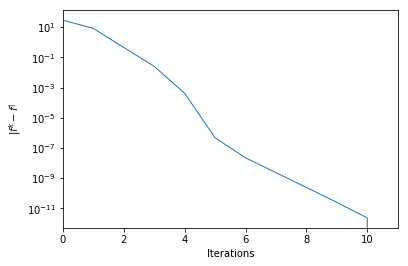

In [15]:
nsteps = history.shape[0]
fhist = np.zeros(nsteps)
fstar = f(a,xstar)

for i in range(nsteps):
    fhist[i] = f(a, history[i,:])
    #print(fhist[i])
    
plt.figure()
plt.autoscale(enable=True, axis='x', tight=True)
plt.semilogy(np.arange(0, nsteps), abs(fhist - fstar), linewidth=1)
plt.xlabel('Iterations')
plt.ylabel(r'$|f^k - f^|$')
plt.show()